In [3]:
# 전처리한 데이터 불러오기
import pandas as pd

df = pd.read_csv('C://Users//and_c//Desktop//sparta_ga4//train_df3.csv', low_memory = False)

In [4]:
# 해당 값 전체 보기 설정
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_columns = None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fullVisitorId              903653 non-null  object 
 1   channelGrouping            903653 non-null  object 
 2   visitStartTime             903653 non-null  int64  
 3   device_browser             903653 non-null  object 
 4   device_operatingSystem     903653 non-null  object 
 5   device_deviceCategory      903653 non-null  object 
 6   geoNetwork_continent       903653 non-null  object 
 7   geoNetwork_subContinent    903653 non-null  object 
 8   geoNetwork_country         903653 non-null  object 
 9   totals_visits              903653 non-null  int64  
 10  totals_hits                903653 non-null  int64  
 11  totals_bounces             903653 non-null  float64
 12  totals_newVisits           903653 non-null  float64
 13  totals_transactionRevenue  90

In [6]:
# 데이터프레임에 한 열의 값을 바꾸기 위해서 def함수를 만들고 apply 적용
import pandas as pd
import datetime #날짜와 시간을 다루는 라이브러리
import pytz #다양한 시간대를 처리하기 위해 사용하는 라이브러리

# Posix 시간을 utc 시간으로 변환하는 함수
def posix_to_utc(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime)
    return utc_time

# Posix 시간을 UTC 지정한 로컬 시간대로 변환하는 함수
def posix_to_utc_local(visitStartTime):
    utc_time = datetime.datetime.utcfromtimestamp(visitStartTime) #posix -> utc시간대로
    local_timezone = pytz.timezone('America/New_York')  # 지역 시간대
    return utc_time.astimezone(local_timezone) # 그 지역 시간대로 변환

In [7]:
df['visitStartTime'] = df['visitStartTime'].apply(posix_to_utc)

DAU / WAU / MAU를 Line Char로 시각화

In [8]:
import matplotlib.pyplot as plt

In [9]:
# DAU구하기
# df['date'] = df['visitStartTime'].dt.strftime('%Y-%m-%d')
df['date'] = df['visitStartTime'].dt.date

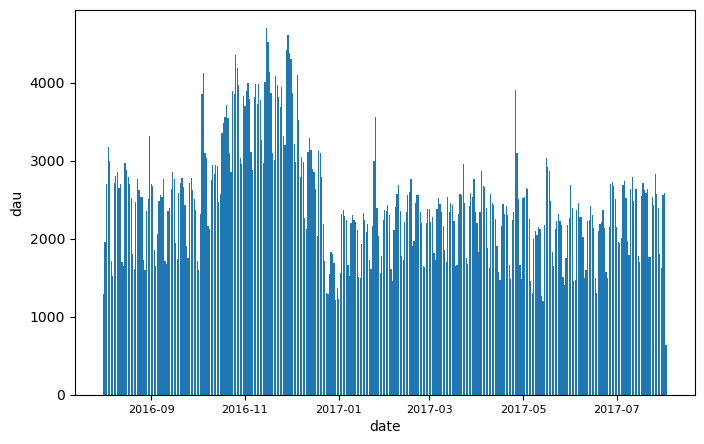

In [10]:
# dau_df = df.groupby(df['date'])[['fullVisitorId']].count()
dau_df = df['date'].value_counts().sort_index()

plt.figure(figsize = (8,5))
# plt.plot(dau_df.index, dau_df['fullVisitorId'])
plt.bar(dau_df.index, dau_df.values)
plt.xlabel('date')
plt.ylabel('dau')
plt.xticks(fontsize=8)
plt.show()

In [11]:
# WAU구하기
df['period_week'] = df['visitStartTime'].dt.to_period("W")

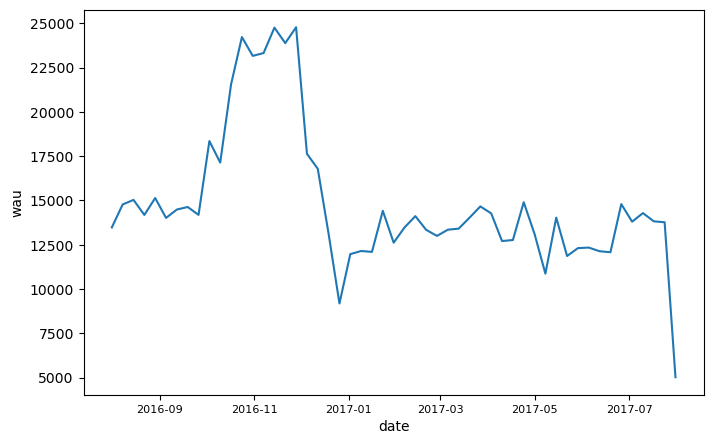

In [12]:
# WAU구하기
# wau_df = df.groupby(df['visitStartTime','year'].dt.week)[['fullVisitorId']].nunique()
wau_df = df.groupby('period_week')[['fullVisitorId']].nunique()

plt.figure(figsize = (8,5))
plt.plot(wau_df.index.to_timestamp(), wau_df['fullVisitorId'])
# period값을 to_timestamp를 사용해 주기의 시작값으로 변환
plt.xlabel('date')
plt.ylabel('wau')
plt.xticks(fontsize=8)
plt.show()

In [13]:
# MAU구하기
# df['period_month'] = df['visitStartTime'].dt.to_period("M")
df['period_month'] = df['visitStartTime'].dt.strftime('%Y-%m')

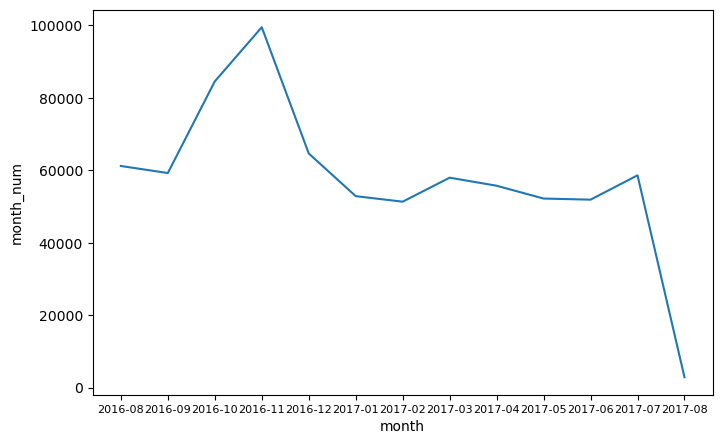

In [14]:
# 월을 기준으로 계산
month_df = df.groupby('period_month')[['fullVisitorId']].nunique()

plt.figure(figsize = (8,5))
plt.plot(month_df.index, month_df['fullVisitorId'])
plt.xlabel('month')
plt.ylabel('month_num')
plt.xticks(fontsize=8)
plt.show()

- 10~12월에 접속량 증가

유저별 평균접속시간 분포 경험적 누적 분포 함수(ECDF : Emperical Cumulative distribution function)로 시각화

In [15]:
# # 실행시간이 너무 오래 걸려서 PASS
# def min_max(x):
#     return x.max()-x.min()

# df.groupby(['fullVisitorId','date'])['visitStartTime'].agg(min_max)

In [16]:
first_visit = df.groupby(['fullVisitorId','date'])['visitStartTime'].min()
last_visit = df.groupby(['fullVisitorId','date'])['visitStartTime'].max()

In [17]:
#1day 00초로 표현되어서 000초로 변환
diff_visit = (last_visit-first_visit).dt.total_seconds()

In [18]:
# 전체 머무른 시간 / 접속한 횟수
average_visit = diff_visit.groupby('fullVisitorId').sum() / diff_visit.groupby('fullVisitorId').count()

- ex. 1시간 혹은 2~3시간 뒤에 다시 접속한 경우가 있으면..?에 관한 의문

In [ ]:
# ECDF 구하기


방문 주차에 따른 코호트를 생성하고, 코호트 별로 weekly 리텐션을 구하고 이를 heatmap으로 시각화

In [19]:
# week 칼럼 만들기
# df['week'] = df['visitStartTime'].dt.week

In [20]:
# newvisit기준으로 신규유입자 구분


In [21]:
# plt.rcParams['figure.figsize'] = [10,8]
# plt.pcolor(table)
# # 또는 sns.heatmap()
# # 피벗테이블의 df를 pandas를 이용해 표현도 가능 df.style.background_gradient
# plt.title('Weekly Retention', fontsize=20)
# plt.xlabel('week', fontsize=14)
# plt.ylabel('visit', fontsize=14)
# plt.colorbar()

Carrying Capapcity

In [22]:
# Wau / (1-retention)
# print(wau_df)


국가별 DAU 평균을 Folium으로 시각화하기

In [23]:
# df.groupby('geoNetwork_continent')

캠페인 효과 분석: 캠페인으로 들어온 사람은 다른 사람과 다른 특징을 가지고 있는지 분석해보기